# Lab 8

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

### Zadanie 1

In [10]:
data = load_iris()
X_train = data["data"]
y_train = data["target"]

# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=19, test_size=0.005)

In [11]:
standardscaler = StandardScaler()
X_train = standardscaler.fit_transform(X_train)

In [12]:
X_train_cov = np.cov(X_train.T)

In [13]:
eigenvalues, eigenvectors = np.linalg.eig(X_train_cov)
print(eigenvalues)

[2.93808505 0.9201649  0.14774182 0.02085386]


In [14]:
Z = X_train @ eigenvectors

In [15]:
def group_classes(data, target):
    c1 = []
    c2 = []
    c3 = []

    for index, value in enumerate(target):
        if value == 0:
            c1.append(data[index])
        elif value == 1:
            c2.append(data[index])
        else:
            c3.append(data[index])

    return np.array([np.array(c1), np.array(c2), np.array(c3)], dtype=object)

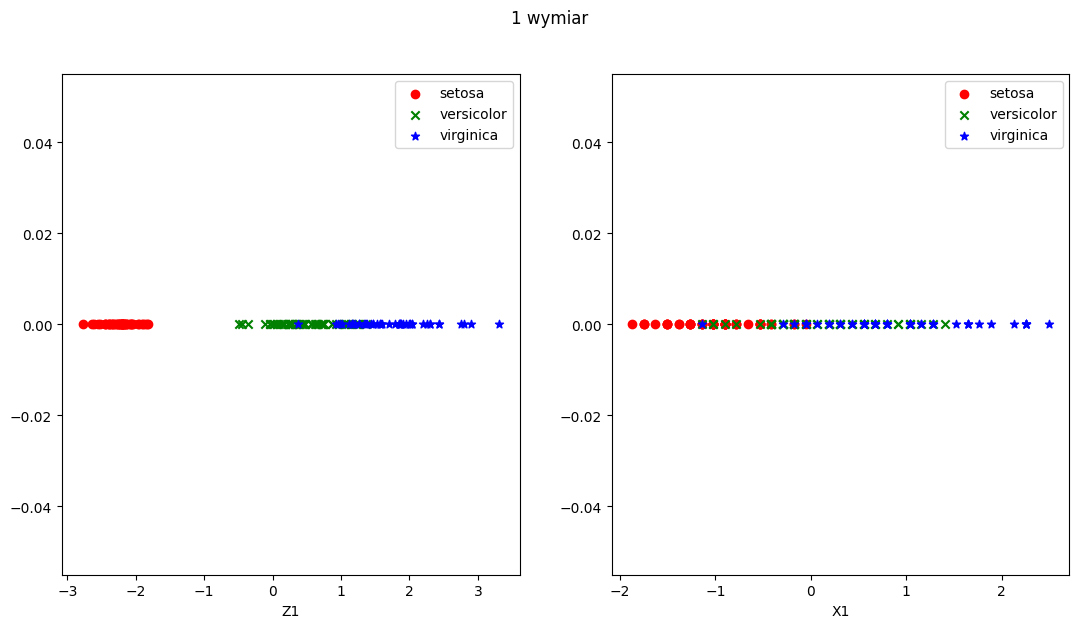

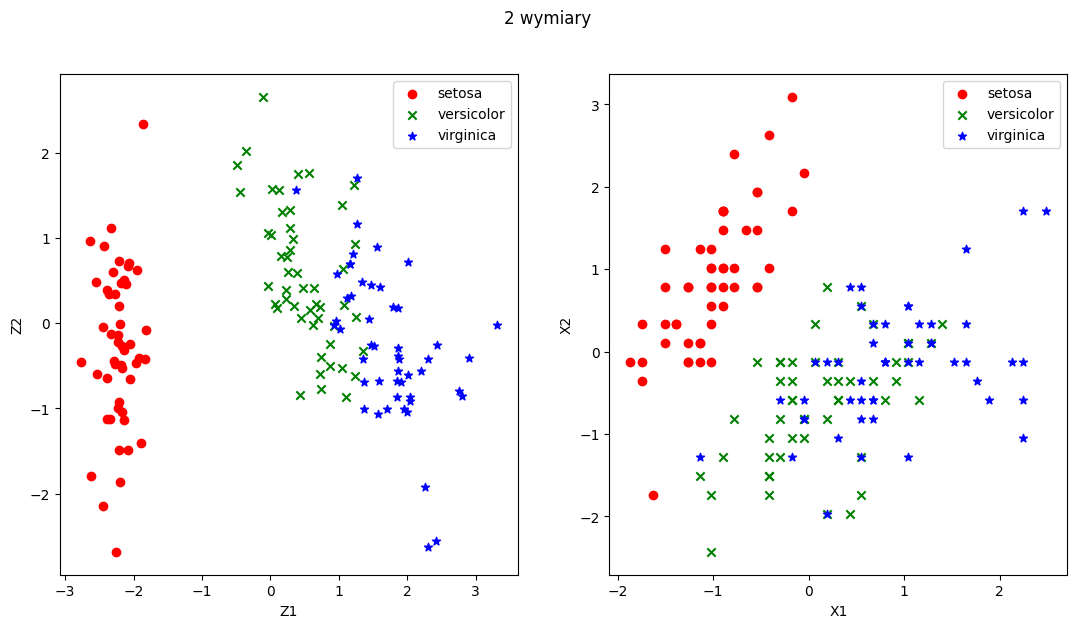

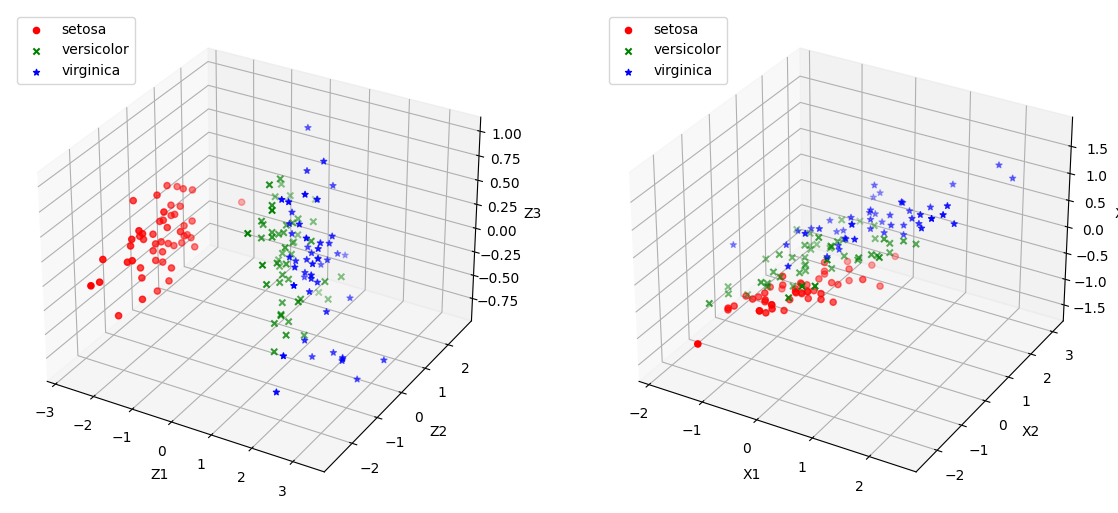

In [16]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches((13, 6.5))

new_Z = group_classes(Z, y_train)
new_X = group_classes(X_train, y_train)

markers = ["o", "x", "*"]
colors = ["r", "g", "b"]

for i in range(0, 3):
    marker = markers[i]
    color = colors[i]
    ax[0].scatter(new_Z[i][:, 0], np.repeat(0, len(new_Z[i][:, 0])), marker=marker, color=color)
ax[0].legend(["setosa", "versicolor", "virginica"])
ax[0].set_xlabel("Z1")

for i in range(0, 3):
    marker = markers[i]
    color = colors[i]
    ax[1].scatter(new_X[i][:, 0], np.repeat(0, len(new_X[i][:, 0])), marker=marker, color=color)
ax[1].legend(["setosa", "versicolor", "virginica"])
ax[1].set_xlabel("X1")
plt.suptitle("1 wymiar")
plt.show()


# -------- 2 dim
fig, ax = plt.subplots(1, 2)
fig.set_size_inches((13, 6.5))

for i in range(0, 3):
    marker = markers[i]
    color = colors[i]
    ax[0].scatter(new_Z[i][:, 0], new_Z[i][:, 1], marker=marker, color=color)
ax[0].legend(["setosa", "versicolor", "virginica"])
ax[0].set_xlabel("Z1")
ax[0].set_ylabel("Z2")

for i in range(0, 3):
    marker = markers[i]
    color = colors[i]
    ax[1].scatter(new_X[i][:, 0], new_X[i][:, 1], marker=marker, color=color)
ax[1].legend(["setosa", "versicolor", "virginica"])
ax[1].set_xlabel("X1")
ax[1].set_ylabel("X2")
plt.suptitle("2 wymiary")

plt.show()


# -------- 3 dim
legends = ["setosa", "versicolor", "virginica"]
fig = plt.figure(figsize=(14, 7))

ax1 = fig.add_subplot(121, projection='3d')

for i in range(0, 3):
    marker = markers[i]
    color = colors[i]
    label = legends[i]
    ax1.scatter(new_Z[i][:, 0], new_Z[i][:, 1], new_Z[i][:, 2], marker=marker, color=color, label=label)

ax1.set_xlabel("Z1")
ax1.set_ylabel("Z2")
ax1.set_zlabel("Z3")


ax2 = fig.add_subplot(122, projection='3d')

for i in range(0, 3):
    marker = markers[i]
    color = colors[i]
    label = legends[i]
    ax2.scatter(new_X[i][:, 0], new_X[i][:, 1], new_X[i][:, 2], marker=marker, color=color, label=label)

ax2.set_xlabel("X1")
ax2.set_ylabel("X2")
ax2.set_zlabel("X3")


ax1.legend(loc='upper left')
ax2.legend(loc='upper left')
plt.show()